<a href="https://colab.research.google.com/github/MacsEli/DocumentosDeClase/blob/main/Workflow_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#leer BD
census = pd.read_csv('/content/drive/MyDrive/Databases/Week 16/census.csv')

In [ ]:
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [ ]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusId         3220 non-null   int64  
 1   State            3220 non-null   object 
 2   County           3220 non-null   object 
 3   TotalPop         3220 non-null   int64  
 4   Men              3220 non-null   int64  
 5   Women            3220 non-null   int64  
 6   Hispanic         3220 non-null   float64
 7   White            3220 non-null   float64
 8   Black            3220 non-null   float64
 9   Native           3220 non-null   float64
 10  Asian            3220 non-null   float64
 11  Pacific          3220 non-null   float64
 12  Citizen          3220 non-null   int64  
 13  Income           3219 non-null   float64
 14  IncomeErr        3219 non-null   float64
 15  IncomePerCap     3220 non-null   int64  
 16  IncomePerCapErr  3220 non-null   int64  
 17  Poverty       

In [ ]:
#Listado con columnas de datos nulos
column_with_nan = census.columns[census.isnull().any()]
#elimino columnas con más del 50%
for column in column_with_nan:
    if census[column].isnull().sum()*100.0/census.shape[0] > 50:
        census.drop(column,1, inplace=True)


In [ ]:
census.info()

In [ ]:
census.dropna(inplace = True)
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3218 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusId         3218 non-null   int64  
 1   State            3218 non-null   object 
 2   County           3218 non-null   object 
 3   TotalPop         3218 non-null   int64  
 4   Men              3218 non-null   int64  
 5   Women            3218 non-null   int64  
 6   Hispanic         3218 non-null   float64
 7   White            3218 non-null   float64
 8   Black            3218 non-null   float64
 9   Native           3218 non-null   float64
 10  Asian            3218 non-null   float64
 11  Pacific          3218 non-null   float64
 12  Citizen          3218 non-null   int64  
 13  Income           3218 non-null   float64
 14  IncomeErr        3218 non-null   float64
 15  IncomePerCap     3218 non-null   int64  
 16  IncomePerCapErr  3218 non-null   int64  
 17  Poverty       

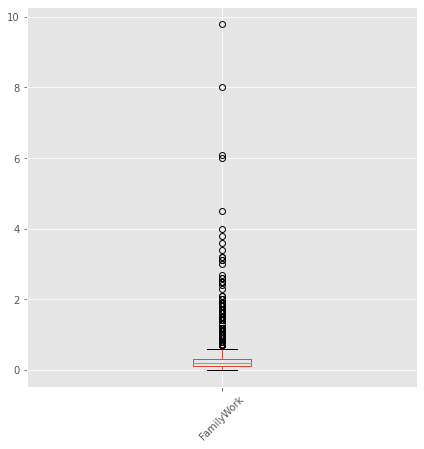

In [ ]:
#Outliers
plt.style.use('ggplot')
plt.figure(figsize=(7,7))
census.boxplot(column=['FamilyWork'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
import numpy as np
q1, q3 = np.percentile(census.FamilyWork,[25,75])
iqr = q3 - q1
upper = q3 + (3*iqr)
lower = q1 - (3*iqr)

In [ ]:
upper

0.8999999999999999

In [ ]:
lower

-0.5

In [ ]:

census_clean = census.loc[census.FamilyWork<upper].copy()

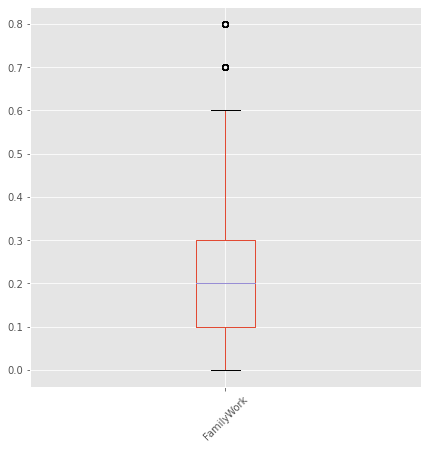

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(7,7))
census_clean.boxplot(column=['FamilyWork'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(census.shape,census_clean.shape)

(3218, 37) (3020, 37)


#Normalización / Escalar variables
1. Hacer que el entrenamiento sea menos sensible a la escala de las catacteristicas, esto ayudara a resolver mejor los coeficientes.
2. AL escalar o normalizar la variables, vamos a poder evaluar el analisis de multiples modeloes

In [ ]:
#Definiendo las columnas que en mi dataset van de 0 a 100 para escalar
conversion=['Hispanic','White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 'Service', 'Office']
def escala(x):
    return(x/100).round(3)

In [ ]:
#renombbrar columnas
n_columns = [x+'Rate' for x in conversion]
census_clean[n_columns] = census_clean[conversion].apply(escala)

In [ ]:
census_clean.NativeRate.head()

0    0.004
1    0.006
2    0.002
3    0.004
4    0.003
Name: NativeRate, dtype: float64

In [ ]:
census_clean[['Native','NativeRate']]

,Native,NativeRate
0,0.4,0.004
1,0.6,0.006
2,0.2,0.002
3,0.4,0.004
4,0.3,0.003
...,...,...
3215,0.0,0.000
3216,0.0,0.000
3217,0.0,0.000
3218,0.0,0.000


In [ ]:
#Estandarización
1. Comparar características que tengan diferentes unidades o escalas.
2. Tiende a que los procesos de entrenamiento se comporten de ua  ejor manera. 

In [ ]:
#MinMax Excaler
#Transformar cada valor de la columna entre un rango de [0,1]
#
from sklearn.preprocessing import MinMaxScaler
census_clean['TotalPopMinMaxScaler'] = MinMaxScaler().fit_transform(census_clean.TotalPop.values.reshape(-1,1))
census_clean.TotalPopMinMaxScaler.describe()

count    3020.000000
mean        0.010478
std         0.032757
min         0.000000
25%         0.001265
50%         0.002822
75%         0.007227
max         1.000000
Name: TotalPopMinMaxScaler, dtype: float64

In [ ]:
census_clean.TotalPop.describe()

In [ ]:
#Standard Scaler
#Elimina la media de neustros datos , Varianza igual a 1
from  sklearn.preprocessing import StandardScaler
scale=StandardScaler()
census_clean['TotalPopStandardScaler'] = scale.fit_transform(census_clean.TotalPop.values.reshape(-1,1))
census_clean.TotalPopStandardScaler.describe()

count    3.020000e+03
mean    -6.855260e-17
std      1.000166e+00
min     -3.199394e-01
25%     -2.813238e-01
50%     -2.337716e-01
75%     -9.926901e-02
max      3.021338e+01
Name: TotalPopStandardScaler, dtype: float64

Usas StandardScaler para funciones que siguen una distribucion normal
PUedes usar MinMaxScaler cuando conoces lo limites superior e inferior
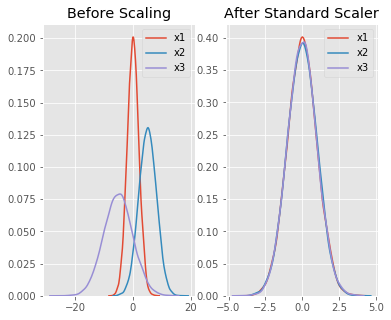

In [ ]:
census_clean[['TotalPop','TotalPopStandardScaler','TotalPopMinMaxScaler']]

,TotalPop,TotalPopStandardScaler,TotalPopMinMaxScaler
0,55221,-0.152784,0.005475
1,195121,0.272755,0.019411
2,26932,-0.238831,0.002656
3,22604,-0.251996,0.002225
4,57710,-0.145213,0.005722
...,...,...,...
3215,56858,-0.147804,0.005638
3216,9130,-0.292980,0.000883
3217,24685,-0.245666,0.002433
3218,36279,-0.210400,0.003588


#Variables Dummy / One Hot Encoding

##LabelEncoding, 
Sonvertir cada valor de una columna no numerica 
a una columna numerica[Col =1, MX = 0, BR =2]
[Nacionalidad|NacionalidadEncoded]
##One Hot Encodinging
VAs a crear columnas para cada uno de tus valores
[Nacionalidad|ColEncoded|MXEncoded|BREncoded]


In [ ]:
estados = pd.get_dummies(census_clean.State)
census_dummy = pd.concat([census_clean,estados],axis=1).copy()
census_dummy.columns.values


array(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'Citizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional',
       'Service', 'Office', 'Construction', 'Production', 'Drive',
       'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'HispanicRate',
       'WhiteRate', 'BlackRate', 'NativeRate', 'AsianRate', 'PacificRate',
       'PovertyRate', 'ServiceRate', 'OfficeRate', 'TotalPopMinMaxScaler',
       'TotalPopStandardScaler', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts',

In [ ]:
census_dummy[['State','Alabama']]

,State,Alabama
0,Alabama,1
1,Alabama,1
2,Alabama,1
3,Alabama,1
4,Alabama,1
...,...,...
3215,Puerto Rico,0
3216,Puerto Rico,0
3217,Puerto Rico,0
3218,Puerto Rico,0


In [ ]:
#Shuffling
#Tomar muestras de nuestra población total
#CAmbios aleatorios en el orden de tu dataset

s_census=census_dummy.sample(frac=1, random_state=0)
s_census_2=census_dummy.sample(frac=1)
s_census.shape

(3020, 100)

In [ ]:
s_census.head(2)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,...,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
468,13165,Georgia,Jenkins,8922,4444,4478,7.8,56.4,33.4,0.0,0.2,0.0,6309,24604.0,4183.0,17366,3238,33.8,57.6,27.1,19.9,14.6,13.2,25.3,70.7,25.3,0.0,2.0,0.0,2.0,21.6,3035,74.6,21.0,4.4,0.0,10.3,0.078,0.564,0.334,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1832,36009,New York,Cattaraugus,78962,39089,39873,1.9,91.2,1.5,2.8,0.8,0.0,60226,42601.0,1264.0,22336,436,18.3,27.7,27.7,20.7,24.6,11.4,15.7,80.7,8.6,0.5,5.6,1.6,3.0,21.8,34265,73.9,19.8,6.1,0.3,8.2,0.019,0.912,0.015,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
s_census_2.head(2)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,...,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2353,45075,South Carolina,Orangeburg,90575,42660,47915,2.0,33.6,61.6,0.3,1.0,0.0,69064,34218.0,1148.0,17889,521,23.5,34.9,28.2,18.1,23.3,9.3,21.1,84.4,10.0,0.2,1.7,1.4,2.3,26.5,33811,75.9,18.8,5.1,0.2,12.8,0.02,0.336,0.616,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
704,18015,Indiana,Carroll,20014,9947,10067,4.0,94.3,0.3,0.0,0.1,0.0,14969,52005.0,2831.0,25365,1171,10.8,12.6,24.9,16.0,22.8,12.0,24.3,79.7,11.6,0.2,2.0,1.3,5.2,27.2,9224,78.6,12.8,8.5,0.1,8.2,0.04,0.943,0.003,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Sample
census_sample_proporcion = census_clean.sample(frac=.5)
census_sample_rows = census_clean.sample(n=1000)
print(census_sample_proporcion.shape)
print(census_sample_rows.shape)

(1510, 48)
(1000, 48)


In [ ]:
#Imporamos funcion de train/test para neustros datasets de entrenamiento y prueba
from sklearn.model_selection import train_test_split
train, test = train_test_split(census_dummy, train_size=.2)
print(train.shape, test.shape)

(604, 100) (2416, 100)


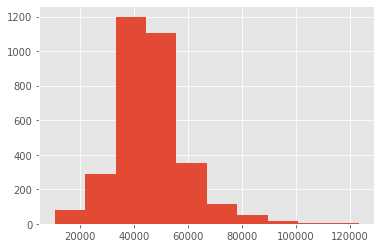

In [ ]:
census['Income'].hist()

In [ ]:
census.Income.describe()

count      3218.000000
mean      46123.616532
std       12908.429676
min       10499.000000
25%       38191.250000
50%       44748.500000
75%       52059.000000
max      123453.000000
Name: Income, dtype: float64

Text(0.5, 1.0, 'Top 30 estados por income')

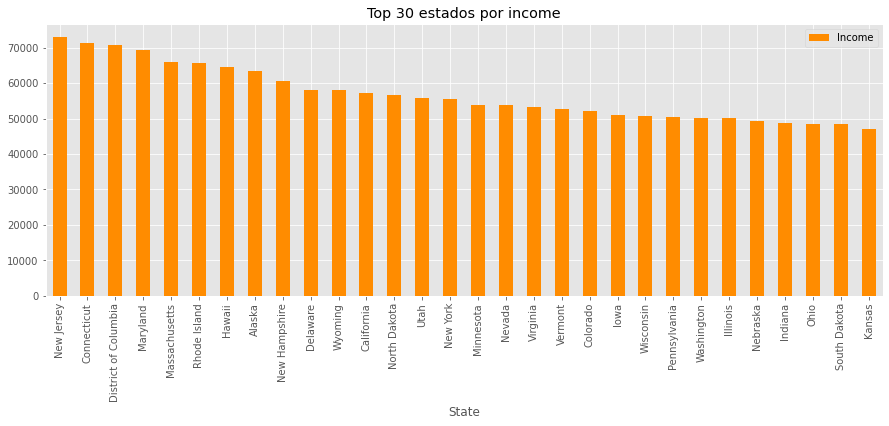

In [ ]:
#Graficamos por estados que tienen un mayor income
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
census_dummy.groupby('State')[['Income']].mean().sort_values('Income',ascending = False).head(30).plot.bar(ax=ax, color='darkorange')
ax.set_title('Top 30 estados por income')

Text(0.5, 1.0, 'Bottom 30 estados por income')

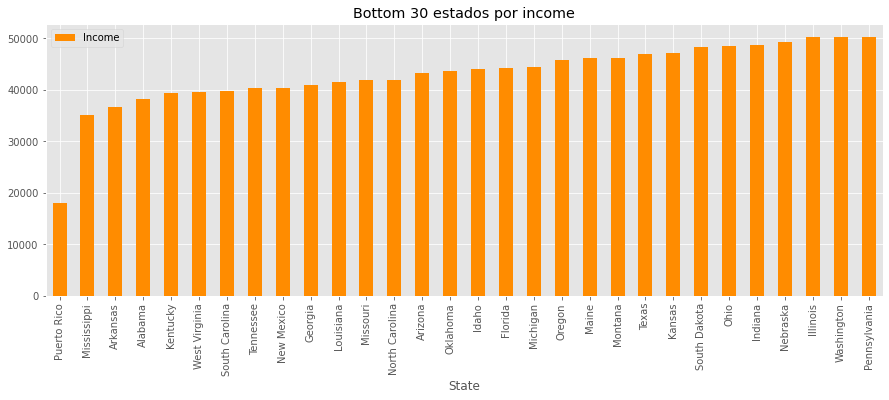

In [ ]:
#Graficamos por estados que tienen un mayor income
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
census_dummy.groupby('State')[['Income']].mean().sort_values('Income',ascending = True).head(30).plot.bar(ax=ax, color='darkorange')
ax.set_title('Bottom 30 estados por income')

In [ ]:
df = census_dummy._get_numeric_data()
df.head()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,...,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1001,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0.026,0.758,0.185,0.004,0.010,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1003,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,0.045,0.831,0.095,0.006,0.007,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1005,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,0.046,0.462,0.467,0.002,0.004,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1007,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,0.022,0.745,0.214,0.004,0.001,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1009,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,0.086,0.879,0.015,0.003,0.001,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Nuestros Datasets para preeparar y/o probar nuestro algoritmo
X = df.drop(columns=['TotalPop','CensusId'])
y = df.TotalPop


In [ ]:
X.head(1)

,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HispanicRate,WhiteRate,BlackRate,NativeRate,AsianRate,PacificRate,PovertyRate,...,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,0.026,0.758,0.185,0.004,0.01,0.0,0.129,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

0        55221
1       195121
2        26932
3        22604
4        57710
         ...  
3215     56858
3216      9130
3217     24685
3218     36279
3219     39474
Name: TotalPop, Length: 3020, dtype: int64

In [ ]:
#Usando funcion para separar por entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2416, 96) (2416,)
(604, 96) (604,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)

In [ ]:
df_predicted = pd.DataFrame({'ACtual':y_test,'Predicted':y_pred})
df_predicted

,ACtual,Predicted
3155,33949,33949.0
612,10943,10943.0
1757,4566,4566.0
539,7956,7956.0
2466,28013,28013.0
...,...,...
1522,10256,10256.0
1334,36620,36620.0
1442,31516,31516.0
305,4795,4795.0


In [ ]:
r2_score(y_test,y_pred)

1.0